In [2]:
import torch
import torch.nn as nn
import dataset as ds
from torch.utils.tensorboard import SummaryWriter
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import segmentation_models_pytorch as smp
import pickle

In [3]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

In [4]:
train_dataloader, test_dataloader = ds.Builder(1,size=128)

In [4]:
images, labels = next(iter(test_dataloader))

In [5]:
img_grid = torchvision.utils.make_grid(images)

In [6]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

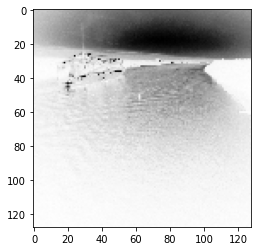

In [7]:
matplotlib_imshow(img_grid, one_channel=True)

In [8]:
writer.add_image('four_fashion_mnist_images', img_grid)

In [5]:
model = smp.Unet(classes=4)
with open(r"C:\Users\Emily\Documents\GitHub\ML-BLIF\Code\Notebooks\BL Projekt\segment_vis\model.pth", "rb") as file:
    state_dict = pickle.load(file)
model.load_state_dict(state_dict)
model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [14]:
writer.add_graph(model, images)
writer.close()

C:\Users\Emily\Documents\GitHub\ML-BLIF\venv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [15]:
class_probs = []
class_label = []
class_label = []
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        output = model(images)
        class_probs_batch = [F.softmax(el, dim=0) for el in output]

        class_probs.append(class_probs_batch)
        class_label.append(labels)
test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_label = torch.cat(class_label)

In [16]:
classes = ("Himmel","Strand","Wasser","Nix")

In [17]:
def add_pr_curve_tensorboard(class_index, test_probs, test_label, global_step=0):
    '''
    Takes in a "class_index" from 0 to 9 and plots the corresponding
    precision-recall curve
    '''
    tensorboard_truth = test_label == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index],
                        tensorboard_truth,
                        tensorboard_probs,
                        global_step=global_step)
    writer.close()

# plot all the pr curves
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_label)

ValueError: weights should have the same shape as a.

In [19]:
model

NeuralNetwork(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3000000, out_features=100, bias=True)
    (2): ReLU()
    (3): Linear(in_features=100, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=4, bias=True)
  )
  (conv): Sequential(
    (0): Conv2d(3, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (conv2): Sequential(
    (0): Linear(in_features=396010, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=10, bias

In [7]:
images, labels = next(iter(test_dataloader))

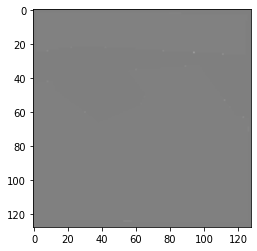

In [30]:
img_grid = torchvision.utils.make_grid(labels)
matplotlib_imshow(img_grid)

In [8]:
with torch.no_grad():
    res = model(images)

C:\Users\Emily\Documents\GitHub\ML-BLIF\venv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [9]:
res_ = res[0]

In [49]:
res_.shape

torch.Size([4, 128, 128])

In [10]:
res__ = res_.permute(1,2,0)

In [52]:
res__.shape

torch.Size([128, 128, 4])

In [60]:
x = res__[:,:,2]

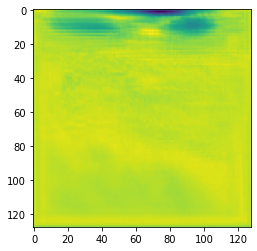

In [62]:
for i in range(4):
    x = res__[:,:,i]
    plt.imshow(x)

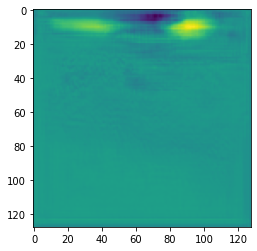

In [61]:
plt.imshow(x)

In [11]:
res_np = res__.numpy()

In [12]:
t_arr = np.zeros((res_np.shape[0],res_np.shape[1]))
for idx,val in enumerate(res_np):
    for idx_,val_ in enumerate(res_np[idx]):
        t_arr[idx,idx_] = int(np.argmax(val_))

In [13]:
t_arr.shape

(128, 128)

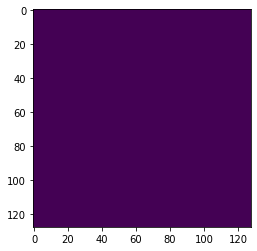

In [84]:
plt.imshow(t_arr)

In [14]:
t_arr.shape

(128, 128)

In [24]:
rgb_arr = np.zeros((t_arr.shape[0],t_arr.shape[1],3))
for idx, val in enumerate(t_arr):
    for idx_,val_ in enumerate(t_arr[idx]):
        if val_ == 1:
            rgb_arr[idx,idx_] = np.array([255,0,0])
        elif val_ == 2:
            rgb_arr[idx,idx_] = np.array([0,255,0])
        elif val_ == 3:
            rgb_arr[idx,idx_] = np.array([0,0,255])
        else:
            rgb_arr[idx,idx_] = np.array([0,0,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


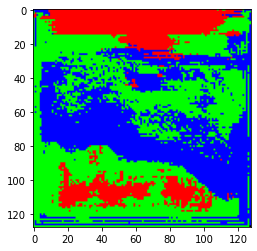

In [25]:
plt.imshow(rgb_arr)